In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [5]:
print("Shape of traning data =",train.shape)
print("Shape of test data =",test.shape)

Shape of traning data = (1168, 81)
Shape of test data = (292, 80)


In [6]:
#Checking the duplicates in ID
train.duplicated(subset='Id').sum()

0

In [7]:
#Checking the duplicates in ID
test.duplicated(subset='Id').sum()

0

In [8]:
train['type'] = 'train'

In [9]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN    NaN         NaN       0      2   2007   
1         Lvl    AllPub  ...    NaN    NaN         NaN       0     10   2007   
2         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2007   
3         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      1   2010   
4         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   2009   

  SaleType  SaleCondition  SalePrice   type  
0       WD         Normal     128000  train  
1       WD         Normal     268000  train  
2       WD         Normal     269790  train  
3      COD         Normal     190000  train  
4       WD         Normal     215000  train  

[5 rows x 82 columns]

In [10]:
test['type'] = 'test'

In [11]:
#Checking the info of train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [12]:
train.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

In [13]:
# checking for the number of unique values in each variable of the train data:

for col in train.columns:
    print("The number of values for", col, len(train[col].unique()))

The number of values for Id 1168
The number of values for MSSubClass 15
The number of values for MSZoning 5
The number of values for LotFrontage 107
The number of values for LotArea 892
The number of values for Street 2
The number of values for Alley 3
The number of values for LotShape 4
The number of values for LandContour 4
The number of values for Utilities 1
The number of values for LotConfig 5
The number of values for LandSlope 3
The number of values for Neighborhood 25
The number of values for Condition1 9
The number of values for Condition2 8
The number of values for BldgType 5
The number of values for HouseStyle 8
The number of values for OverallQual 10
The number of values for OverallCond 9
The number of values for YearBuilt 110
The number of values for YearRemodAdd 61
The number of values for RoofStyle 6
The number of values for RoofMatl 8
The number of values for Exterior1st 14
The number of values for Exterior2nd 15
The number of values for MasVnrType 5
The number of values

In [14]:
for col in test.columns:
    print("The number of values for",col, len(test[col].unique()))

The number of values for Id 292
The number of values for MSSubClass 15
The number of values for MSZoning 4
The number of values for LotFrontage 66
The number of values for LotArea 249
The number of values for Street 2
The number of values for Alley 3
The number of values for LotShape 4
The number of values for LandContour 4
The number of values for Utilities 2
The number of values for LotConfig 5
The number of values for LandSlope 3
The number of values for Neighborhood 24
The number of values for Condition1 8
The number of values for Condition2 2
The number of values for BldgType 5
The number of values for HouseStyle 8
The number of values for OverallQual 8
The number of values for OverallCond 7
The number of values for YearBuilt 84
The number of values for YearRemodAdd 57
The number of values for RoofStyle 5
The number of values for RoofMatl 3
The number of values for Exterior1st 12
The number of values for Exterior2nd 14
The number of values for MasVnrType 5
The number of values for

In [15]:
# Checking number of types of data in both dataset:
print('Train Dataset:\n',train.dtypes.value_counts())
print('\t')
print('Test Dataset:\n',test.dtypes.value_counts())

Train Dataset:
 object     44
int64      35
float64     3
dtype: int64
	
Test Dataset:
 object     43
int64      34
float64     4
dtype: int64


After this inspection of the datasets, we saw that there are a total of 1168 training examples and 292 test examples. In the train dataset the total number of attributes/features are 81, which includes ID and SalePrice. And in test dataset we have 80 attributes/features which doesn't contain the variable 'SalePrice', and that's our target variable.

In [16]:
#Saving the Id column and seggregating them as per dataset
train_ID = train['Id']
test_ID = test['Id']

In [17]:
#Dropping the Id column
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [18]:
# Concatenating both datasets:

concat = [train,test]

# Dropping the index of the DataFrame and replaces it with an index of increasing integers:

all_data = pd.concat(concat).reset_index(drop=True)  
                                                    
# Deleting SalePrice from all_data:

all_data.drop(['SalePrice'], axis=1, inplace=True)

In [19]:
all_data

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            120       RL          NaN     4928   Pave   NaN      IR1   
1             20       RL         95.0    15865   Pave   NaN      IR1   
2             60       RL         92.0     9920   Pave   NaN      IR1   
3             20       RL        105.0    11751   Pave   NaN      IR1   
4             20       RL          NaN    16635   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          20       RL         78.0    10206   Pave   NaN      Reg   
1456          20       RL         57.0     9245   Pave   NaN      IR2   
1457          20       RL          NaN    11241   Pave   NaN      IR1   
1458          50       RM         50.0     5000   Pave   NaN      Reg   
1459         160       RM         21.0     1953   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
4            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub   CulDSac  ...        0    NaN    NaN        Shed   
1458         Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition   type  
0          0      2    2007        WD         Normal  train  
1          0     10    2007        WD         Normal  train  
2          0      6    2007        WD         Normal  train  
3          0      1    2010       COD         Normal  train  
4          0      6    2009        WD         Normal  train  
...      ...    ...     ...       ...            ...    ...  
1455       0     10    2008        WD         Normal   test  
1456       0      2    2008        WD         Normal   test  
1457     700      3    2010        WD         Normal   test  
1458       0     10    2006        WD         Normal   test  
1459       0      6    2006        WD         Normal   test  

[1460 rows x 80 columns]

# MISSING VALUES

 - LET'S DELETE THOSE COLUMN WHICH IS NOT THAT USEFULL

In [20]:
print(all_data['PoolQC'].value_counts())
print('\t')
print(all_data['Street'].value_counts())
print('\t')
print(all_data['Utilities'].value_counts())

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
	
Pave    1454
Grvl       6
Name: Street, dtype: int64
	
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [21]:
# Let's drop all those which are not useful variables:
all_data = all_data.drop(['Utilities', 'Street', 'PoolQC',], axis=1)
print('Shape of all_data= {}'.format(all_data.shape))

Shape of all_data= (1460, 77)


In [22]:
# visualizing missing values:

plt.figure(figsize=(10,5))
sns.heatmap(all_data.isna())

<AxesSubplot:>

In [23]:
# Checking the categorical variables that content Null values:

print('Categorical Columns that content Null values')
category = all_data.select_dtypes(include=object).isna().sum().sort_values(ascending=False)
category[category > 0]

Categorical Columns that content Null values


MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

In [24]:
# Let's check for the percentage of these categorical variables that content Null values:

categorical_miss_val = round(100*(all_data.select_dtypes(include=object).isna().sum().\
sort_values(ascending=False)/len(all_data.index)),2)\
.to_frame().rename(columns={0:'Null values percentage'})[:10]
categorical_miss_val

Null values percentage
MiscFeature                    96.30
Alley                          93.77
Fence                          80.75
FireplaceQu                    47.26
GarageCond                      5.55
GarageQual                      5.55
GarageFinish                    5.55
GarageType                      5.55
BsmtFinType2                    2.60
BsmtExposure                    2.60

In [25]:
# 'MiscFeature', 'Alley', 'Fence' for all of these featurs most of their 90% data is missing, so we can drop it:

all_data = all_data.drop(['MiscFeature', 'Alley', 'Fence',], axis=1)
print('Shape of all_data= {}'.format(all_data.shape))

Shape of all_data= (1460, 74)


In [26]:
#Filling all the categorical column with None which have NaN values

all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('None')
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('None')
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('None')
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('None')
all_data['Electrical'] = all_data['Electrical'].fillna('None')
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data['GarageType'] = all_data['GarageType'].fillna('None')
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('None')
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')
all_data['MSZoning'] = all_data['MSZoning'].fillna('None')
all_data['Functional'] = all_data['Functional'].fillna('None')
all_data['SaleType'] = all_data['SaleType'].fillna('None')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('None')
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('None')
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('None')

In [27]:
# Checking the numerical columns that content Null values:

print('Numerical Columns that content Null values')
Columns = all_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending=False)
Columns[Columns > 0]

Numerical Columns that content Null values


LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

In [28]:
# Let's check for the percentage of these numerical variables that content Null values:

numerical_miss_val = round(100*(all_data.select_dtypes(include=np.number).isna().sum().sort_values(ascending=False)/len(all_data.index)),2)\
.to_frame().rename(columns={0:'Null values percentage'})[:5]
numerical_miss_val

Null values percentage
LotFrontage                   17.74
GarageYrBlt                    5.55
MasVnrArea                     0.55
YrSold                         0.00
BsmtFinSF2                     0.00

 - We can see that the maximum null value Percentage that is of LotFrontage is not even 18%. So dropping any of them will not be a good option. Hence we are going to replace the null values.

In [29]:
# Grouping by neighborhood and filling the NaN value with median LotFrontage of all the neighborhood:

all_data['LotFrontage'] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [30]:
# Replacing all the Nan values in GarageYrBlt with median
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].median())

In [31]:
# Replacing all the Nan values in MasVnrArea with median
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(all_data['MasVnrArea'].median())

In [32]:
#Checking for NULL values now
sum(all_data.select_dtypes(include=object).isna().sum() != 0)

0

<AxesSubplot:>

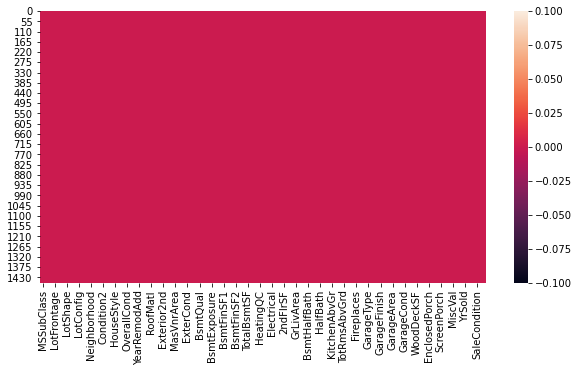

In [33]:
plt.figure(figsize=(10, 5))
sns.heatmap(all_data.isna())

 - So, finally we have removed all the null values.

# Analysis of Target Variable

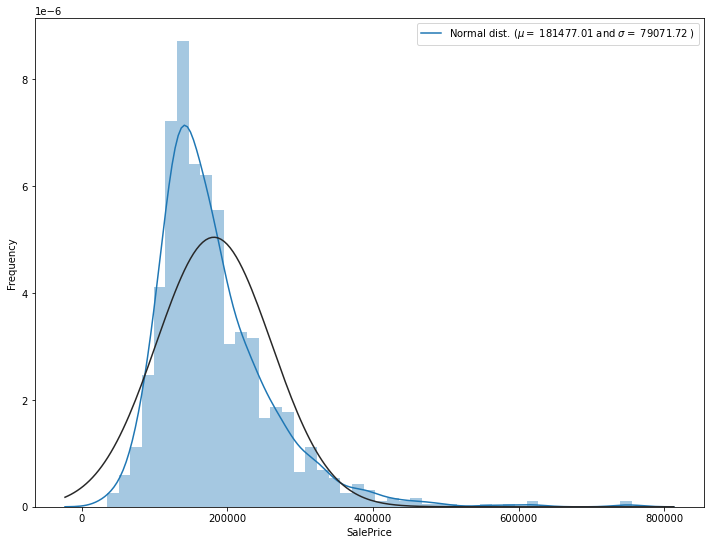

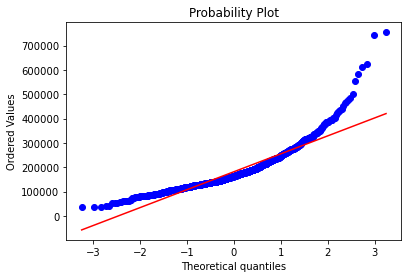

In [34]:
plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Getting the fitted parameters used by the function:

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plotting with the distribution:

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Probablity plot:

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

 - We can see that our taret variable is not normalised and is positively skewed.

In [35]:
# Analysing kurtosis and the skewness to check the normality of the variable:

kurt = train['SalePrice'].kurtosis()
skew = train['SalePrice'].skew()
print('Sale Price Kurtorsis {}'.format(kurt))
print('Sale Price Skewness {}'.format(skew))

Sale Price Kurtorsis 7.390656691648756
Sale Price Skewness 1.953877705368286


 - We will try to normalise the column using log.

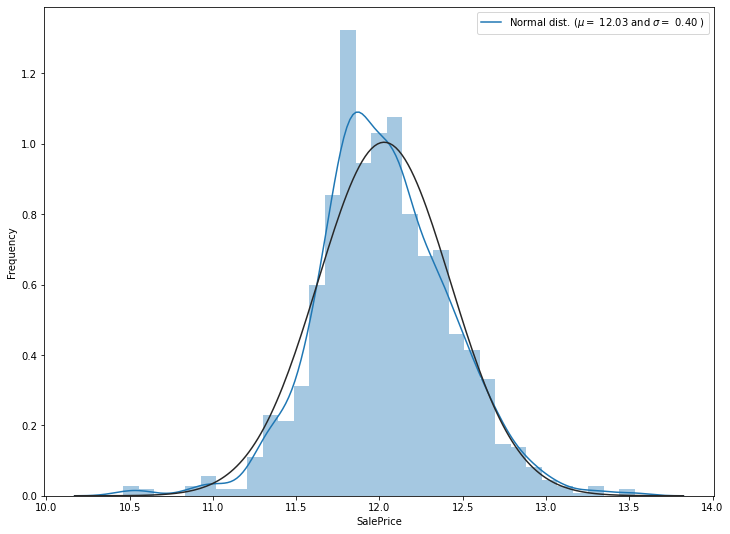

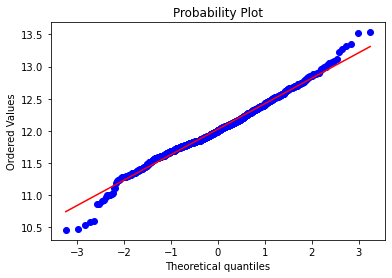

In [36]:
train['SalePrice'] = np.log1p(train['SalePrice'])

# Let's check the normality now

plt.subplots(figsize=(12,9))
sns.distplot(train['SalePrice'], fit=stats.norm)

# Getting the fitted parameters used by the function:

(mu, sigma) = stats.norm.fit(train['SalePrice'])

# plotting with the distribution now:

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# probablity plot:

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [37]:
# Correlation between columns and target column:

corr = train.corr()
corr['SalePrice'].sort_values(ascending=False)[1:15].to_frame().\
style.background_gradient(axis=1,cmap=sns.light_palette('yellow', as_cmap=True))

In [38]:
# Separating variable into new dataframe from original dataframe which has only numerical values
# There is 38 numerical attribute from 81 attributes:

train_corre = train.select_dtypes(include=[np.number])
train_corre.shape

(1168, 37)

<AxesSubplot:>

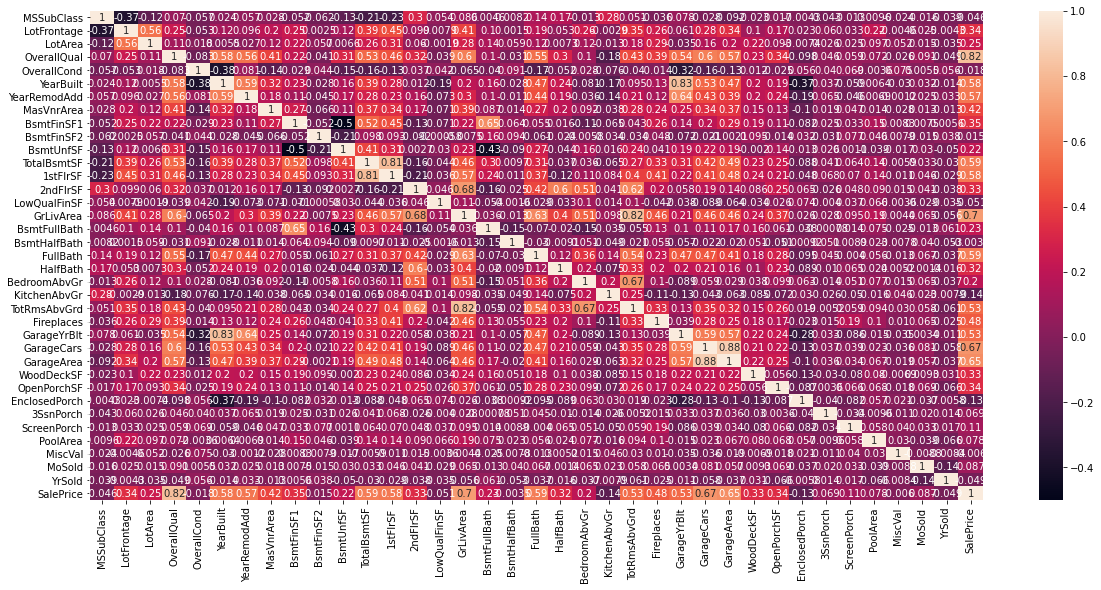

In [39]:
# Let's visualize a big Correlation plot:

corr = train_corre.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

In [40]:
# Checking now for correlation higher than 0.5:

top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [41]:
# let's separeting the categorical variables into ordinals and nominals:

# Ordinals:

categorical_ordinal = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'RoofMatl', 
                     'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1',
                     'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                     'GarageCond','PavedDrive']

In [42]:
# Nominals:

categorical_nominal = ['MSSubClass', 'MSZoning', 'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'CentralAir',
                     'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'Electrical', 'MasVnrType', 'Exterior1st',
                     'Exterior2nd', 'Heating', 'Foundation','type']

In [43]:
#From sklearn importing LabelEncoder library to encode the ordinal variables:

from sklearn.preprocessing import LabelEncoder
for col in categorical_ordinal:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[col].values)) 
    all_data[col] = lbl.transform(list(all_data[col].values))

In [44]:
# Get k-1 dummies in nominal variables to avoid multicollinearity:

nominal_one_hot = pd.get_dummies(all_data[categorical_nominal], drop_first= True).reset_index(drop=True)

# checking it:

print(f'Shape of nominal_one_hot: {nominal_one_hot.shape}')
nominal_one_hot.head()

Shape of nominal_one_hot: (1460, 115)


MSSubClass  MoSold  YrSold  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0         120       2    2007            0            0            1   
1          20      10    2007            0            0            1   
2          60       6    2007            0            0            1   
3          20       1    2010            0            0            1   
4          20       6    2009            0            0            1   

   MSZoning_RM  Neighborhood_Blueste  Neighborhood_BrDale  \
0            0                     0                    0   
1            0                     0                    0   
2            0                     0                    0   
3            0                     0                    0   
4            0                     0                    0   

   Neighborhood_BrkSide  ...  Heating_GasW  Heating_Grav  Heating_OthW  \
0                     0  ...             0             0             0   
1                     0  ...             0             0             0   
2                     0  ...             0             0             0   
3                     0  ...             0             0             0   
4                     0  ...             0             0             0   

   Heating_Wall  Foundation_CBlock  Foundation_PConc  Foundation_Slab  \
0             0                  1                 0                0   
1             0                  0                 1                0   
2             0                  0                 1                0   
3             0                  1                 0                0   
4             0                  1                 0                0   

   Foundation_Stone  Foundation_Wood  type_train  
0                 0                0           1  
1                 0                0           1  
2                 0                0           1  
3                 0                0           1  
4                 0                0           1  

[5 rows x 115 columns]

In [45]:
# Now lets concatenate the one Hot Encoded categorcal nominal features with main data frame.

# First we need to drop the catgorical nominal columns from all_data:

all_data = all_data.drop(categorical_nominal, axis= 'columns')

# Now lets concat it:

all_data = pd.concat([all_data, nominal_one_hot], axis='columns')

# Checking shape now:

print(f'Shape of all_data: {all_data.shape}')


all_data.head()

Shape of all_data: (1460, 171)


LotFrontage  LotArea  LotShape  LandContour  LotConfig  LandSlope  \
0         24.0     4928         0            3          4          0   
1         95.0    15865         0            3          4          1   
2         92.0     9920         0            3          1          0   
3        105.0    11751         0            3          4          0   
4         80.0    16635         0            3          2          0   

   BldgType  OverallQual  OverallCond  YearBuilt  ...  Heating_GasW  \
0         4            6            5       1976  ...             0   
1         0            8            6       1970  ...             0   
2         0            7            5       1996  ...             0   
3         0            6            6       1977  ...             0   
4         0            6            7       1977  ...             0   

   Heating_Grav  Heating_OthW  Heating_Wall  Foundation_CBlock  \
0             0             0             0                  1   
1             0             0             0                  0   
2             0             0             0                  0   
3             0             0             0                  1   
4             0             0             0                  1   

   Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  \
0                 0                0                 0                0   
1                 1                0                 0                0   
2                 1                0                 0                0   
3                 0                0                 0                0   
4                 0                0                 0                0   

   type_train  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 171 columns]

# Seperating the training and testing data

In [48]:
# Let's separate data:

train_data = pd.DataFrame(all_data[:1168])
test_data = pd.DataFrame(all_data[1168:])


In [49]:
train_data.head()

LotFrontage  LotArea  LotShape  LandContour  LotConfig  LandSlope  \
0         24.0     4928         0            3          4          0   
1         95.0    15865         0            3          4          1   
2         92.0     9920         0            3          1          0   
3        105.0    11751         0            3          4          0   
4         80.0    16635         0            3          2          0   

   BldgType  OverallQual  OverallCond  YearBuilt  ...  Heating_GasW  \
0         4            6            5       1976  ...             0   
1         0            8            6       1970  ...             0   
2         0            7            5       1996  ...             0   
3         0            6            6       1977  ...             0   
4         0            6            7       1977  ...             0   

   Heating_Grav  Heating_OthW  Heating_Wall  Foundation_CBlock  \
0             0             0             0                  1   
1             0             0             0                  0   
2             0             0             0                  0   
3             0             0             0                  1   
4             0             0             0                  1   

   Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  \
0                 0                0                 0                0   
1                 1                0                 0                0   
2                 1                0                 0                0   
3                 0                0                 0                0   
4                 0                0                 0                0   

   type_train  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 171 columns]

In [50]:
test_data.drop('type_train',axis=1,inplace=True)

In [51]:
train_data.drop('type_train',axis=1,inplace=True)

In [52]:
# Taking values X and y:

X = train_data
y = train['SalePrice']

In [53]:
# Split data into train and test formate:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
# Checking:

print(f'Training set sizes: {X_train.shape}, {y_train.shape}')
print(f'Validation set sizes: {X_test.shape}, {y_test.shape}')


Training set sizes: (876, 170), (876,)
Validation set sizes: (292, 170), (292,)


# Building the Model

In [55]:
# Training the model:

from sklearn import linear_model
model_lineal = linear_model.LinearRegression()

In [56]:
# Fitting the model:

model_lineal.fit(X_train, y_train)


LinearRegression()

In [57]:
# First evaluation of the LinearRegression model:

print("Accuracy --> ", round(model_lineal.score(X_test, y_test)*100),"%")

Accuracy -->  71 %


In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

RMSE is: 
 0.0420139615268442


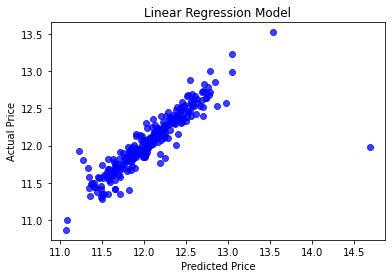

In [59]:
# Making predictions:
predictions_1 = model_lineal.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_1))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_1, actual_values, alpha=.75,
            color='b')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [60]:
# Train the model:

from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100)

In [61]:
model2.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
# First evaluation of the RandomForestRegression model:

print("Accuracy  --> ", round(model2.score(X_test, y_test)*100),"%")

Accuracy  -->  86 %


RMSE is: 
 0.019961859421175263


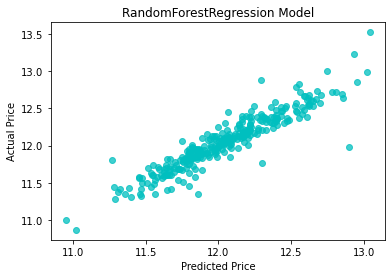

In [63]:
# Making predictions:

predictions_2 = model2.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_2))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_2, actual_values, alpha=.75,
            color='c')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('RandomForestRegression Model')
plt.show()

In [64]:
# Train the model:

from sklearn.linear_model import BayesianRidge
baysian_ridge = BayesianRidge()#(compute_score=True,alpha_2=0.85)

# Fitting the model:
baysian_ridge.fit(X_train, y_train)

BayesianRidge()

In [65]:
# First evaluation of the BayesianRidge model:

print("Accuracy  --> ", round(baysian_ridge.score(X_test, y_test)*100),"%")

Accuracy  -->  75 %


RMSE is: 
 0.03692844226098637


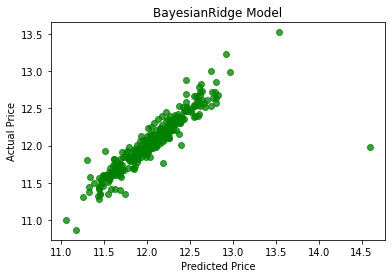

In [66]:
# Making predictions:

predictions_3 = baysian_ridge.predict(X_test)

# RMSE Calculation:

print('RMSE is: \n', mean_squared_error(y_test, predictions_3))

# Visulization to compare real prices <-> Predicted Prices:

actual_values = y_test
plt.scatter(predictions_3, actual_values, alpha=.75,
            color='g')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('BayesianRidge Model')
plt.show()

In [67]:
# Train the model:

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

# Fitting the model:

gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [68]:
# Evaluation of the GradientBoostingRegressor model:
print("Accuracy --> ",round(gbr.score(X_test, y_test)*100),"%")

Accuracy -->  87 %


RMSE is: 
 0.01913586777500903


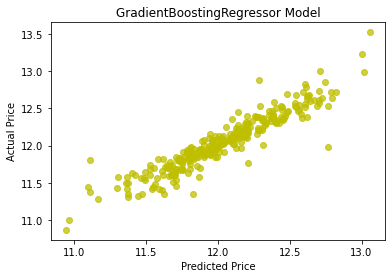

In [69]:
# Making predictions:

predictions_4 = gbr.predict(X_test)

# RMSE Calculation:
print('RMSE is: \n', mean_squared_error(y_test, predictions_4))

# Visulization to compare real prices <-> Predicted Prices:
actual_values = y_test
plt.scatter(predictions_4, actual_values, alpha=.75,
            color='y')  # alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('GradientBoostingRegressor Model')
plt.show()

In [70]:
# Importing Libraries to carry out Cross Valitation:  

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [71]:
# Creating a list with the four models:

All_models = ['Linear_Reg.','Random_Forest_Reg.','Bayesian_Ridge_Reg.','Grad_Boost_Reg.']

In [72]:
# Creation of the RMSE formula:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [73]:
# Cross Valitation formula:

def RMSE_CV(estimator,X_train, Y_train, cv=5,n_jobs=4):
    cv_results = cross_val_score(estimator,X_train,Y_train,cv=cv,scoring="neg_mean_squared_error",n_jobs=n_jobs)
    return (np.sqrt(-cv_results)).mean()

In [74]:
# Creating List for each measure:

RMSE_CV_scores = []
RMSE_scores = []
MAE_scores = []

In [75]:
# Calculating RMSE_CV for each one:

model_lineal_RMSE_CV = RMSE_CV(model_lineal, X_train, y_train)
RMSE_CV_scores.append(model_lineal_RMSE_CV)
RForest_model_RMSE_CV = RMSE_CV(model2, X_train, y_train)
RMSE_CV_scores.append(RForest_model_RMSE_CV)
baysian_ridge_model_RMSE_CV = RMSE_CV(baysian_ridge, X_train, y_train)
RMSE_CV_scores.append(baysian_ridge_model_RMSE_CV)
gbr_model_RMSE_CV = RMSE_CV(gbr, X_train, y_train)
RMSE_CV_scores.append(gbr_model_RMSE_CV)

# Calculating rmse for each one:

linear_model_rmse = rmse(y_test, predictions_1)
RMSE_scores.append(linear_model_rmse)
RForest_model_rmse = rmse(y_test, predictions_2)
RMSE_scores.append(RForest_model_rmse)
BayRidge_model_rmse = rmse(y_test, predictions_3)
RMSE_scores.append(BayRidge_model_rmse)
GBoosting_model_rmse = rmse(y_test, predictions_4)
RMSE_scores.append(GBoosting_model_rmse)

# Calculating mean_absolute_error for each one:

linear_model_mae = mean_absolute_error(predictions_1, y_test)
MAE_scores.append(linear_model_mae)
RForest_model_mae = mean_absolute_error(predictions_2, y_test)
MAE_scores.append(RForest_model_mae)
BayRidge_model_mae = mean_absolute_error(predictions_3, y_test)
MAE_scores.append(BayRidge_model_mae)
GBoosting_model_mae = mean_absolute_error(predictions_4, y_test)
MAE_scores.append(GBoosting_model_mae)

In [76]:
# Making all the results togheter for comparison:

final_evaluation_scores = pd.DataFrame(All_models, columns = ['Regressors'])
final_evaluation_scores['RMSE_CV_scores'] = RMSE_CV_scores
final_evaluation_scores['RMSE_scores'] = RMSE_scores
final_evaluation_scores['MAE_scores'] = MAE_scores
final_evaluation_scores

Regressors  RMSE_CV_scores  RMSE_scores  MAE_scores
0          Linear_Reg.        0.151031     0.204973    0.097714
1   Random_Forest_Reg.        0.152279     0.141286    0.095883
2  Bayesian_Ridge_Reg.        0.142031     0.192168    0.093461
3      Grad_Boost_Reg.        0.144966     0.138332    0.096221

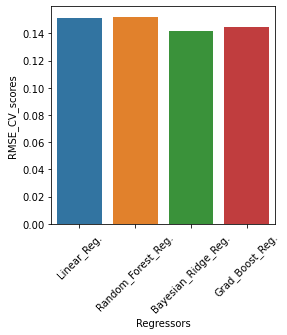

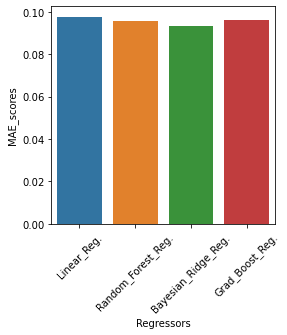

In [77]:
# Visualization RMSE_CV_scores:

plt.figure(figsize = (4,4))
sns.barplot(final_evaluation_scores['Regressors'],final_evaluation_scores['RMSE_CV_scores'])
plt.xlabel('Regressors', fontsize = 10)
plt.ylabel('RMSE_CV_scores', fontsize = 10)
plt.xticks(rotation=45)
plt.show()
print('\t')

# Visualization RMSE_scores:

plt.figure(figsize = (4,4))
sns.barplot(final_evaluation_scores['Regressors'],final_evaluation_scores['RMSE_scores'])
plt.xlabel('Regressors', fontsize = 10)
plt.ylabel('RMSE_scores', fontsize = 10)
plt.xticks(rotation=45)
plt.show()
print('\t')

# Visualization MAE_scores:

plt.figure(figsize = (4,4))
sns.barplot(final_evaluation_scores['Regressors'],final_evaluation_scores['MAE_scores'])
plt.xlabel('Regressors', fontsize = 10)
plt.ylabel('MAE_scores', fontsize = 10)
plt.xticks(rotation=45)
plt.show()

 - From the above all the models, the best model is Gradient_boosting Regression

 - Let's save the model

In [80]:
# Lets save the model having highest accuracy using joblib 
import joblib
joblib.dump(gbr,'gbr_housing.pkl')

['gbr_housing.pkl']